<a href="https://colab.research.google.com/github/Akrosys/AlgorithmeDC/blob/master/dataResultsFootball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP | Résultats du football international de 1872 à 2020

Ce dataset contient les résultats des matchs de football internationaux depuis le premier match officiel en 1972 jusqu'en 2019. 

Les matchs étudiés appartiennent aux principales compétitions internationales et matchs amicaux. 

Les données ne comprennent pas les Jeux olympiques ni les matchs où au moins une des équipes était l'équipe B du pays, l'équipe U-23 ou une équipe sélectionnée par la ligue.

##Import du dataset et des librairies

In [ ]:
#Import des librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Chargement du dataset
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks/Exercices/TP | International Football Results'
results = pd.read_csv(root_path+"/results.csv", sep=",")
print("dataset loaded")

Mounted at /content/gdrive
dataset loaded


##Analyse des contenus du dataset

In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41640 entries, 0 to 41639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        41640 non-null  object
 1   home_team   41640 non-null  object
 2   away_team   41640 non-null  object
 3   home_score  41640 non-null  int64 
 4   away_score  41640 non-null  int64 
 5   tournament  41640 non-null  object
 6   city        41640 non-null  object
 7   country     41640 non-null  object
 8   neutral     41640 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [ ]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Le dataset est composé de 8 colonnes.


0.   **date :** Une colonne de type Object qui indique la date du déroulement du match
1.   **home_team** : Une colonne de type Object qui indique l'équipe à domicile
2.   **away_team** : Une colonne de type Object qui indique l'équipe à l'extérieur
3.   **home_score** : Une colonne de type int64 qui indique le score de l'équipe à domicile
4.   **away_score** : Une colonne de type int64 qui indique le score de l'équipe à l'extérieur
5.   **tournament** : une colonne de type Object qui indique la compétition jouée
6.   **city** : Une colonne de type Object qui indiqe la ville ou se joue le match
7.   **country** : Une colonne de type Object qui indiqe le pays ou se joue le match
8.   **neutral** : une colonne de type Object qui indique si le lieu du match est neutre.





##Nettoyage du dataset

In [ ]:
results.isnull().sum().sum()

0

In [ ]:
results.isna().sum().sum()

0

Comme on peut le voir ci-dessus, il n'y a aucune données manquantes

##La meilleure équipe de tous les temps
Grâce à ce dataset, nous allons identifier la meilleure équipe de tous les temps, ce n'est pas l'équipe qui a gagné le plus de trophées mais l'équipe qui a gagné le plus de match

###Identifier l'équipe gagnante et perdante
Dans ce dataset, nous avons tous les résultats internationaux, mais le dataset ne permet pas d'identifier clairement l'équipe qui a remporté le match. Afin de trouver qui est l'équipe gagnante, il faut identifier quel est le score le plus élevé entre domicile et extérieur. Puis faire un lien avec l'équipe correspondante sans oublier les matchs nuls.

**Objectif**: Pour chaque date, indiquer l'équipe gagnante et perdante.

In [ ]:
#Copie du tableau afin de ne pas biaiser le tableau d'origine
results2 = results.copy()

#Ajout de la colonne winner et loser
results2['winner'] = np.where((results2['home_score'] > results2['away_score']), results2['home_team'], np.where((results2['home_score'] < results2['away_score']), results2['away_team'], 'Draw'))
results2['loser'] = np.where((results2['home_score'] > results2['away_score']), results2['away_team'], np.where((results2['home_score'] < results2['away_score']), results2['home_team'], 'Draw'))

results2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England


###Quelle équipe a gagné le plus de match ?
Afin d'identifier la meilleure équipe de foot, on va tout d'abord faire un critère ultra simpliste, qui a gagné le plus de match de foot.

**Objectif**: Afficher un graphique avec les équipes et leurs nombres de victoires.

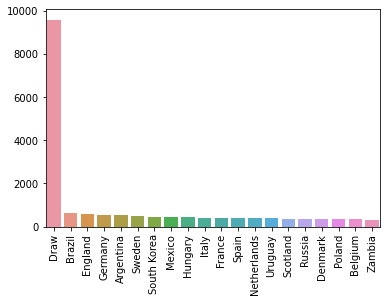

In [ ]:
sns.barplot(x=results2['winner'].value_counts().index[:20], y=results2['winner'].value_counts().values[:20])
plt.xticks(rotation=90) # Afficher les valeurs x verticalement
plt.show()

Dans ce tableau, nous avons pris les 20 équipes avec le plus de victoires, cependant le résultat qui apparaît le plus souvent est le match nul. Ce qui nous permet pas d'identifier clairement le graphique. Nous allons donc enlever les matchs nuls.


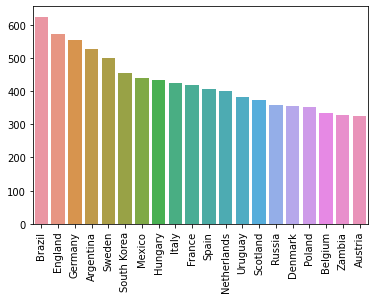

In [ ]:
sns.barplot(x=results2['winner'].value_counts().index[1:21], y=results2['winner'].value_counts().values[1:21])
plt.xticks(rotation=90)
plt.show()

En analysant ce graphique, on voit clairement que l'équipe avec le plus de victoire est le Brésil. 

**Peut on définir le Brésil comme la meilleure équipe de tous les temps ?** NON


*   Le nombre de match joué n'est pas égal
*   Les rencontres ne sont pas forcement équilibré (Les pays appartenant aux memes continents ont tendance à beaucoup s'affonter, les matchs intercontinent sont plus rares.)
*   Le prestige des matchs, un match amical a plus une valeur d'entrainement que de compétitions.




##Quel est la compétition la plus jouée ?

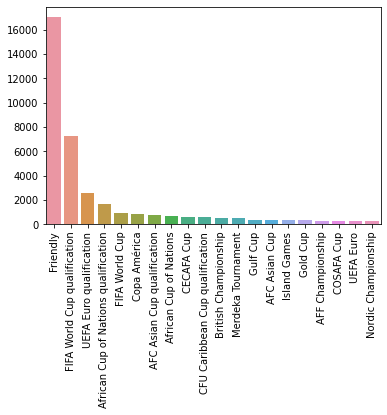

In [ ]:
sns.barplot(x=results2['tournament'].value_counts().index[:20], y=results2['tournament'].value_counts().values[:20])
plt.xticks(rotation=90)
plt.show()

On constate que les matchs amicaux sont enorméments joués par rapport aux autres compétitions. Sinon les match de qualification de la coupe du monde et de l'Euro complète le podium.

##Evolution du football international au fil des années
Etude du nombre de match de football

In [ ]:
#Date object vers date
results2['date'] = pd.to_datetime(results2['date'])

In [ ]:
#Création de la colonne année
results2['year']  = results2['date'].apply(lambda time: time.year)
results2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,Draw,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,Draw,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,1876


In [ ]:
#Nombre de match par an
nbre_match = results2['year'].value_counts()
nbre_match.head()

2019    1155
2008    1091
2011    1081
2004    1064
2000    1026
Name: year, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Années')

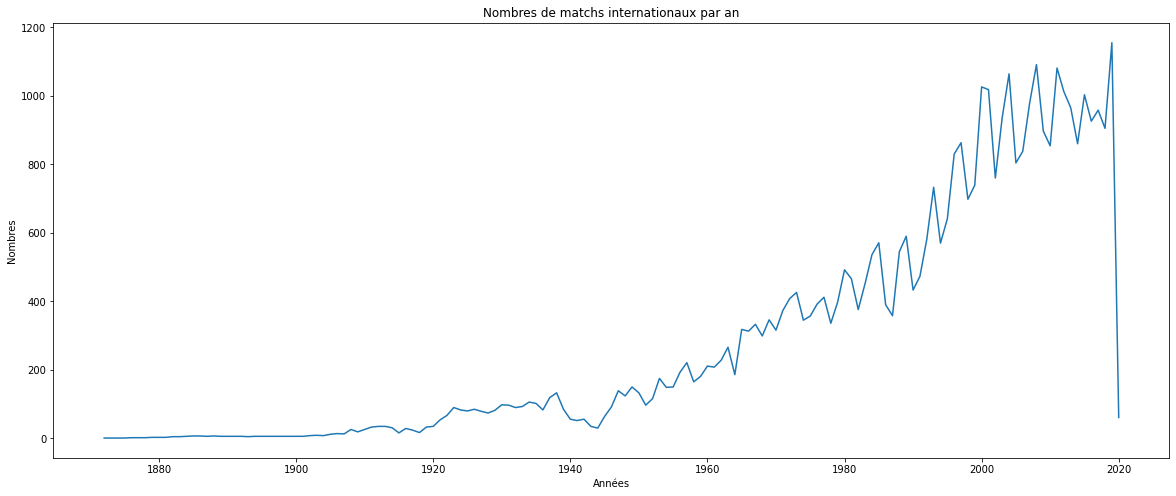

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(nbre_match.index, nbre_match.values)
plt.title('Nombres de matchs internationaux par an')
plt.ylabel('Nombres')
plt.xlabel('Années')

On constate que le foot a évolué de manière exponentielle à partir des années 60. Et on peut aussi identifier en 2020 l'affaiblissement de la courbe suite au coronavirus. On peut aussi voir l'effet de la seconde guerre mondiale.

Les différents pics peuvent être liés aux compétitions qui ont lieu tous les 4 ans ou tous les 2 ans, ce qui expliquent les variations.

##Nombre de buts

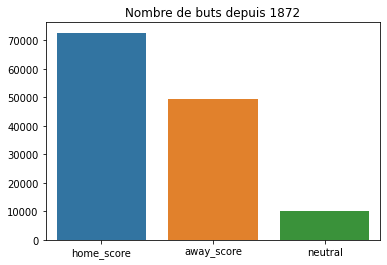

In [ ]:
sns.barplot(x=results2.groupby(by=['year']).sum().sum().index[:], y=results2.groupby(by=['year']).sum().sum())
plt.title("Nombre de buts depuis 1872")
plt.show()

On constate depuis 1872 qu'il y a beeaucoup plus de buts marqués par une équipe à domicile plutot qu'a l'extérieur, on peut en déduire que jouer à domicile est un avantage dans le football.

*PS : Je n'ai pas réussi à enlever la valeur neutre*



##L'évolution du nombre de but en fonction des années

In [ ]:
#Ajout de la colonne nombre de but
results2['but'] = results2['home_score'] + results2['away_score']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Années')

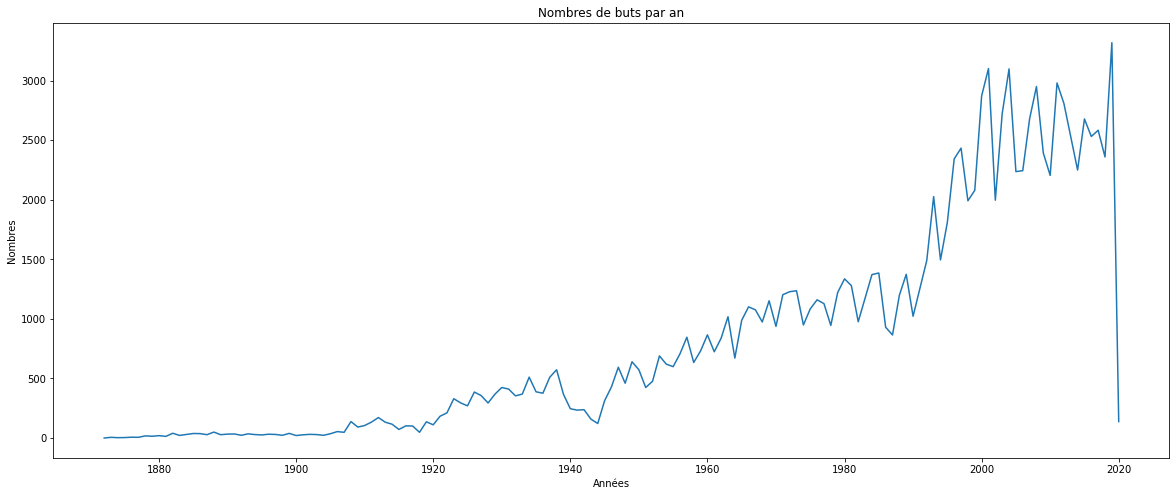

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(results2.groupby(by=['year']).sum().but.index, results2.groupby(by=['year']).sum().but.values)
plt.title('Nombres de buts par an')
plt.ylabel('Nombres')
plt.xlabel('Années')

La courbe ressemble à celle du nombres de match par an. Ce qui est logique puisque plus il y a de match plus le nombre de buts à des chances d'augmenter.

## La meilleure attaque

In [ ]:
results2.groupby(by=['home_team']).sum()

,home_score,away_score,neutral,year,but
home_team,,,,,
Abkhazia,36,11,12,36298,47
Afghanistan,51,61,34,80333,112
Albania,195,203,20,351472,398
Alderney,5,27,7,14087,32
Algeria,521,250,104,582324,771
...,...,...,...,...,...
Yugoslavia,439,236,7,372638,675
Zambia,563,250,70,598266,813
Zanzibar,63,100,29,115419,163


#Merci d'avoir lu jusqu'au bout, j'attends un virement de 50euros. Me contacter en privé pour mon PayPal